<a href="https://colab.research.google.com/github/FaithOsamaye/Mobile-Phone-Prediction/blob/main/Mobile_Phone_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [ ]:
df= pd.concat([train_data,test_data],ignore_index=True)

**Exploratory data analysis**

In [ ]:
df.shape

(3000, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000,1000.000000
mean,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,4.456333,...,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000,1.500000,500.500000
std,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,2.289361,...,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034,1.118314,288.819436
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000,250.750000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,4.000000,...,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000,500.500000
75%,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,...,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000,750.250000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1000.000000


In [ ]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN


**Missing Values**

<Axes: >

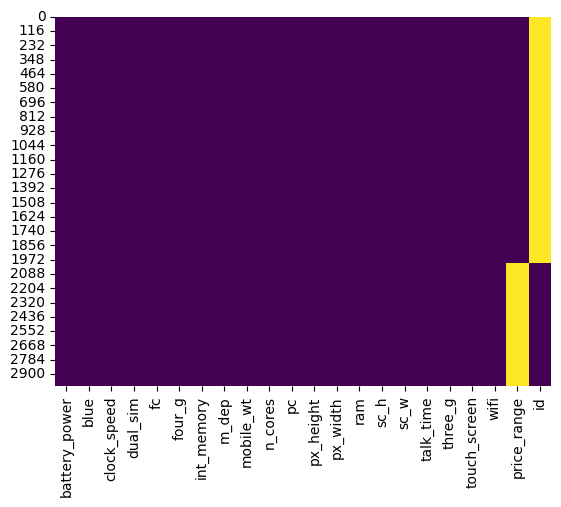

In [ ]:
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')

In [ ]:
price_fill = df['price_range'].mode().iloc[0]
df['price_range'].fillna(price_fill, inplace=True)

**Dropping columns**

<Axes: >

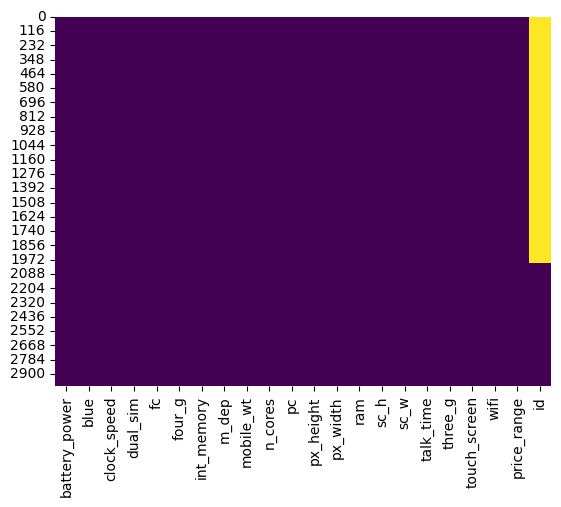

In [ ]:
sns.heatmap(df.isnull(),cbar=False, cmap='viridis')

In [ ]:
df.drop(columns='id',axis=1,inplace=True)

In [ ]:
df.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn-v0_8')

**Questions and Answers**

1. **How many phones have touch screen?**

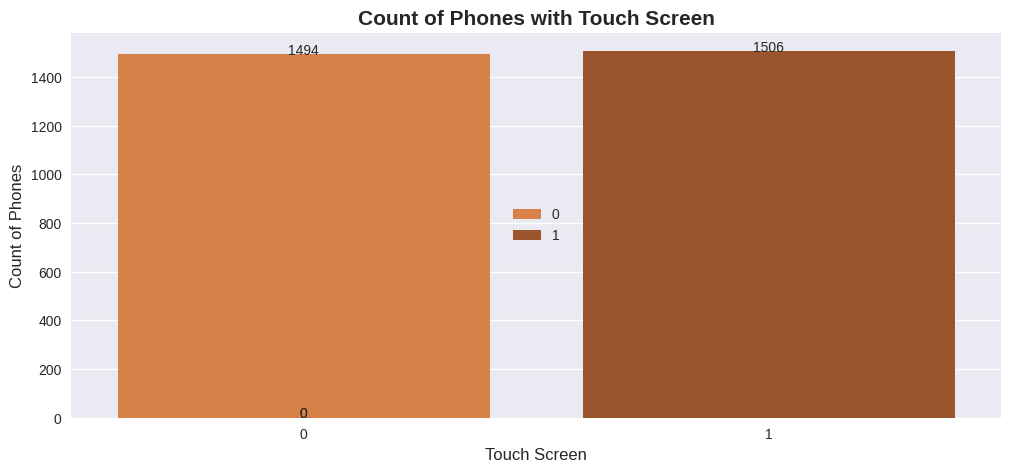

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='touch_screen',data=df,hue='touch_screen',palette='Oranges_d')
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
plt.xlabel('Touch Screen',fontsize=12)
plt.ylabel('Count of Phones',fontsize=12)
plt.title('Count of Phones with Touch Screen',weight='bold', fontsize=15)
plt.legend(loc='center')

**Insight**: The number of phones that have touch screen and the ones that do not have touch screen are relatively close.

**2. What is the clock speed for phones that have dual sim?**

Text(0.5, 1.0, 'Clock speed vs dual sim')

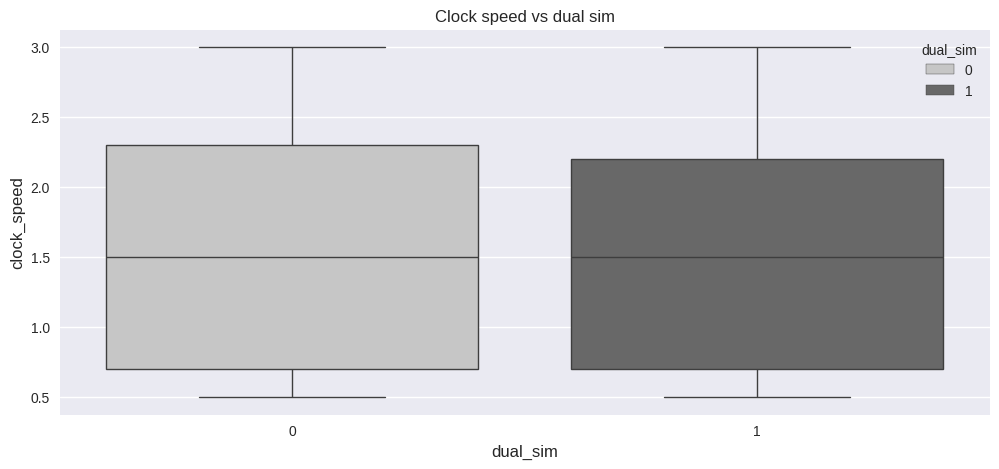

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='dual_sim', y='clock_speed', data=df,hue='dual_sim', palette='Greys')
plt.xlabel('dual_sim', fontsize=12)
plt.ylabel('clock_speed', fontsize=12)
plt.title('Clock speed vs dual sim')

**Insights**: The Q1 and the interquartile range of clock speed at which microprocessor executes instructions by phone who do not have dual sim and ones that have dual sim are the same. With the Q1 being less that 1.0, which means both phones operate on the ssame level.
The difference is seen at the Q3, with the phone not having dual sim being higher in number.

**3. Is there any relationship or correlation with the clock speed and the talk time?**

Text(0.5, 1.0, 'Clock speed vs Talk time')

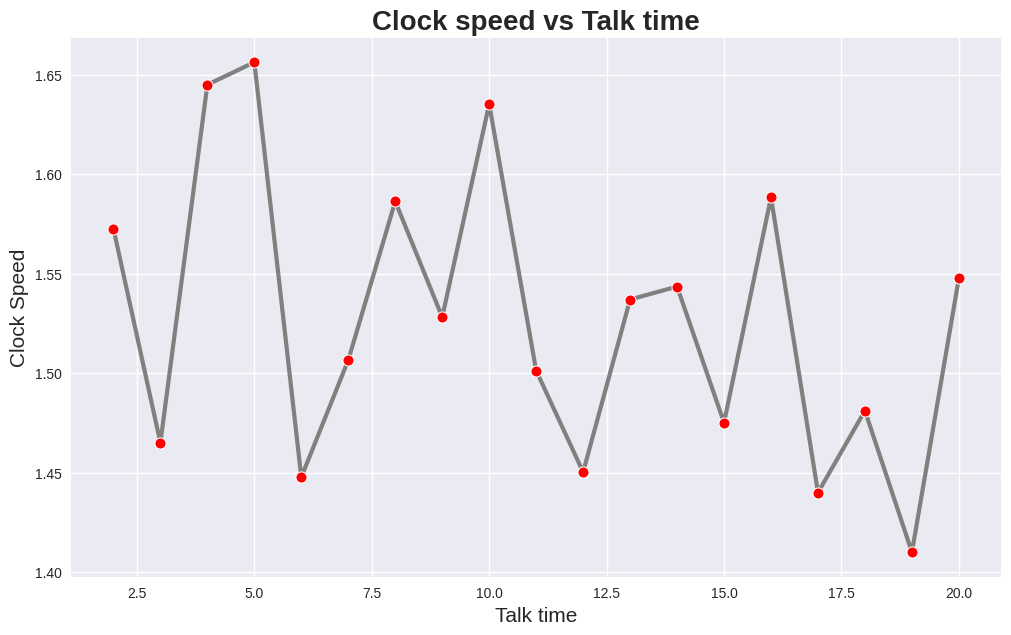

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(x='talk_time', y='clock_speed', data=df, errorbar=None,color='grey',lw=3,marker='o',markersize=8, markerfacecolor='red')
plt.xlabel('Talk time', fontsize=15)
plt.ylabel('Clock Speed', fontsize=15)
plt.title('Clock speed vs Talk time', weight='bold', fontsize=20)

**Insights**: Phone that last longer with over 20 hours with a single battery charge have a clock speed of 1.55.

Whilst, phones with lower talk time is relatively close to the phones of over 20 hours in terms of talk time.

The data is varying according to the talk time.

**4. What is the distribution of battery power and the number of cores of processors?**

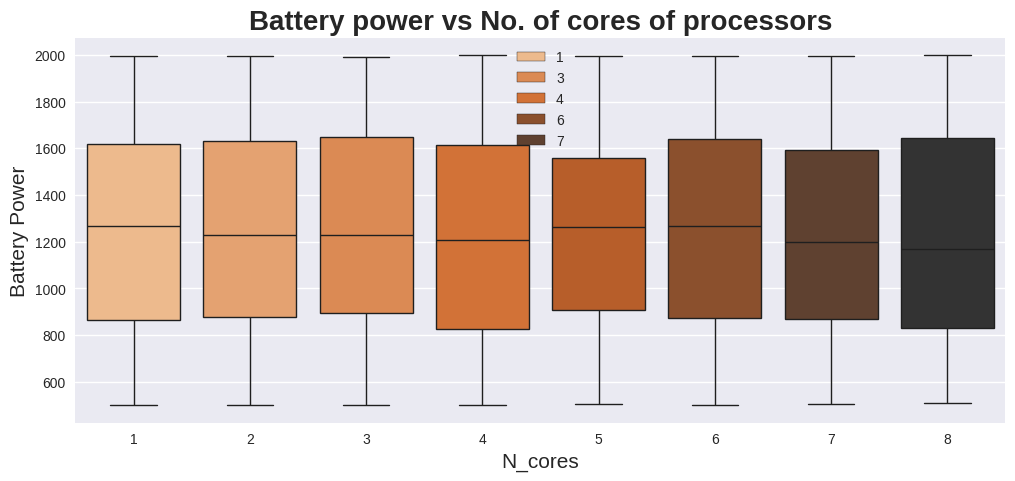

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(y='battery_power', x='n_cores', data=df,hue='n_cores',palette='Oranges_d')
plt.xlabel('N_cores', fontsize=15)
plt.ylabel('Battery Power', fontsize=15)
plt.title('Battery power vs No. of cores of processors',weight='bold', fontsize=20)
plt.legend(loc='upper center')

**Insights**: The lowest Q1 is the phone with n_cores of 5 and a battery power of a little over 800.

**5. The phones that have 3g or 4g, are they expensive or not?**

Text(0.5, 1.0, '4g Phones')

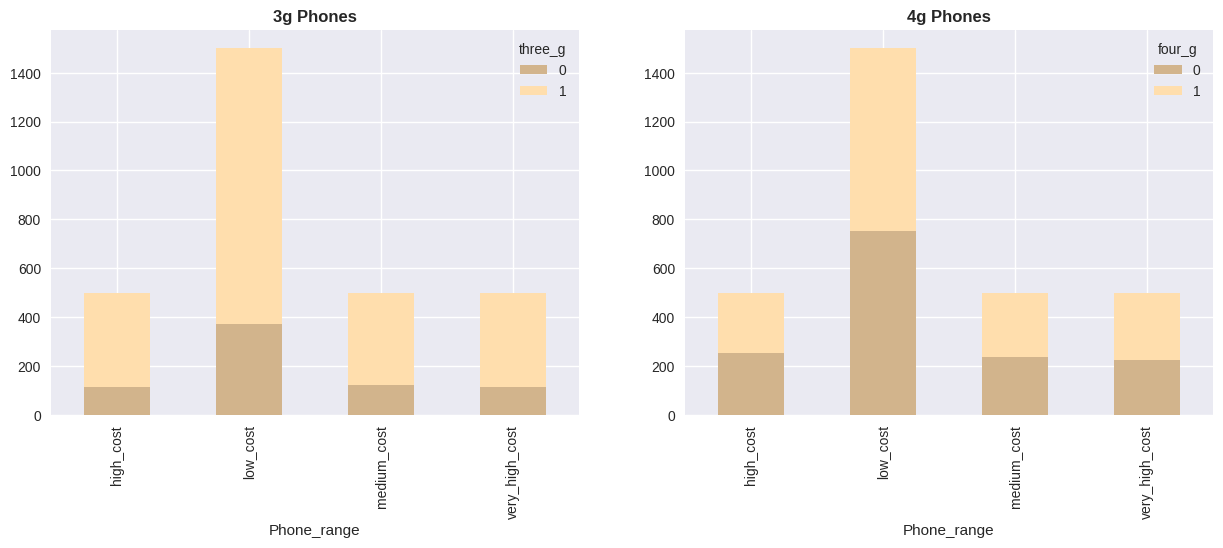

In [ ]:
df['Phone_range'] = df['price_range'].map({0:'low_cost',1:'medium_cost', 2:'high_cost', 3:'very_high_cost'})
fig,axes = plt.subplots(1,2,figsize=(15,5))
col=['tan','navajowhite']
grouped1 =df.groupby(['Phone_range','three_g']).size().unstack()
grouped1.plot(kind='bar',stacked=True,ax=axes[0],color=col)
axes[0].set_title('3g Phones',weight='bold')
grouped2 =df.groupby(['Phone_range','four_g']).size().unstack()
grouped2.plot(kind='bar',stacked=True,ax=axes[1],color=col)
axes[1].set_title('4g Phones',weight='bold')

**Insight**: Low cost phones predominates our 3g data and also our 4g phones.

# **Machine Learning-Classification**

**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data.shape

(2000, 21)

In [ ]:
X = train_data.drop(columns=['price_range'],axis=1)
y= train_data['price_range']

In [ ]:
X.shape

(2000, 20)

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
X_train_rescaled = scale.fit_transform(X_train)
X_test_rescaled = scale.transform(X_test)

In [ ]:
#Train a classifier With Random state

log_model=LogisticRegression(random_state=0)

log_model.fit(X_train,y_train)

#Predicitions

y_pred = log_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   0   0   0]
 [  1  86   4   0]
 [  0   9  77   6]
 [  0   0   4 108]]


In [ ]:
accuracy_score(y_test,y_pred)

0.94

In [ ]:
model_params = {'logistic_regression':{'model':LogisticRegression(solver='liblinear',multi_class='auto'),'params':{'C':[1,5,10] }}}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scores = []

for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,y)
    scores.append({
            'model':model_name,
            'best_scores':clf.best_score_,
            'best_params':clf.best_params_
        }
    )
pd.DataFrame(scores,columns=['model','best_scores','best_params'])

,model,best_scores,best_params
0,logistic_regression,0.8375,{'C': 10}


In [ ]:
#Train a classifier With C parameter

log_model=LogisticRegression(C=10)

log_model.fit(X_train,y_train)

#Predicitions

y_pred = log_model.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       103
           1       0.99      0.95      0.97        95
           2       0.95      0.99      0.97        88
           3       0.99      0.97      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



In [ ]:
print(confusion_matrix(y_pred,y_test))

[[102   1   0   0]
 [  3  90   2   0]
 [  0   0  87   1]
 [  0   0   3 111]]


In [ ]:
#Evaluate
score_LR_train = log_model.score(X_train,y_train)
print(f"Train accuracy: {score_LR_train}")

score_LR_test = log_model.score(X_test,y_test)
print(f"Test accuracy: {score_LR_test}")

Train accuracy: 0.975
Test accuracy: 0.975


In [ ]:
#Now lets try out the model on our test data
X_test_original = test_data.drop('id', axis=1)

# Use the trained model (log_model) to make predictions on the test data
y_new_pred = log_model.predict(X_test_original)
y_new_pred
# Create a new DataFrame to store the predictions along with the test data's identifiers (e.g., 'id' column)
predictions_df = pd.DataFrame({'id': test_data['id'], 'predicted_price_range': y_new_pred})

# Concatenate the original test data with the predictions
test_with_predictions_df = pd.concat([test_data, predictions_df['predicted_price_range']], axis=1)

In [ ]:
test_with_predictions_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,3


In [ ]:
#Try it out on a datset i formed
new_data = ({'battery_power':[5000],'blue': [0],'clock_speed': [3.0],'dual_sim': [1],'fc':[15],'four_g': [1],'int_memory': [40],'int_memory':[62],'m_deep':[0.7],'mobile_wt':[250],'n_cores':[8],'pc':[14],'px_height':[1500],'px_width':[1000],'ram':[5768],'sc_h':[12],'sc_w':[1],'talk_time':[20],'three_g':[0],'touch_screen':[1],'wifi':[0]})

new_data_array = np.array(list(new_data.values())).T

In [ ]:
log_model.predict(new_data_array)

array([3])

**Note:**

0 Means Low cost

1 Means Medium cost

2 Means High cost

3 Means Very high cost


# **2. K nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_pred=knn.predict(X_test)

In [ ]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52        93
           1       0.32      0.27      0.29       107
           2       0.36      0.31      0.34       105
           3       0.49      0.58      0.53        95

    accuracy                           0.42       400
   macro avg       0.41      0.43      0.42       400
weighted avg       0.41      0.42      0.41       400



In [ ]:
print(confusion_matrix(knn_pred,y_test))

[[51 22 14  6]
 [34 29 29 15]
 [15 21 33 36]
 [ 5 19 16 55]]


In [ ]:
accuracy=accuracy_score(knn_pred,y_test)
print(f'The accuracy score is {round(accuracy,2)}')

The accuracy score is 0.42


In [ ]:
error_rate=[]

for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 0, 'K Value')

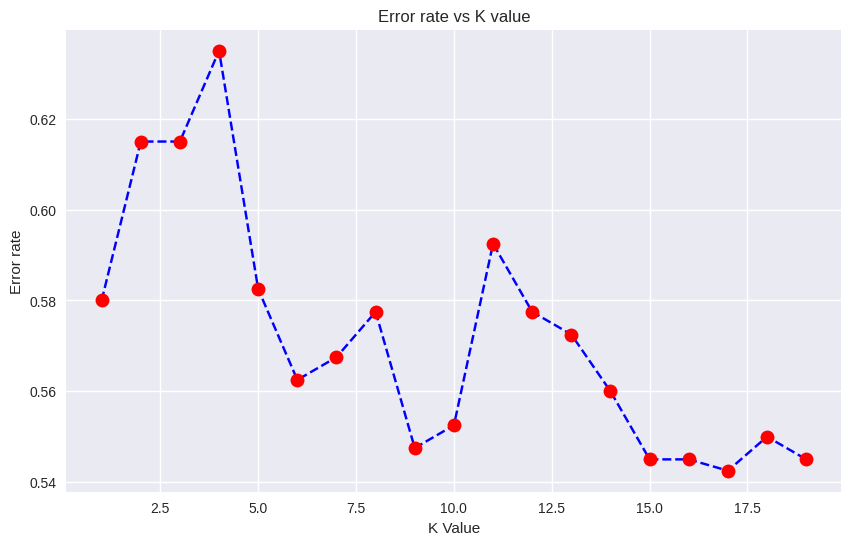

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.ylabel('Error rate')
plt.xlabel('K Value')

In [ ]:
#Retrain the model with a value like 15, since it has a low error rate
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

In [ ]:
#Evaluate
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56       111
           1       0.35      0.31      0.33       102
           2       0.41      0.33      0.37       116
           3       0.46      0.72      0.56        71

    accuracy                           0.46       400
   macro avg       0.45      0.48      0.45       400
weighted avg       0.45      0.46      0.45       400



In [ ]:
print(confusion_matrix(pred,y_test))

In [ ]:
accuracy = accuracy_score(pred,y_test)
print(f'The new accuracy score is {round(accuracy,2)}')

The new accuracy score is 0.45


In [ ]:
#Trying it out on the data i created
knn.predict(new_data_array)

array([3])

**3. Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

In [ ]:
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.85      0.80      0.82        96
           2       0.77      0.76      0.76        94
           3       0.87      0.93      0.90       104

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [ ]:
print(confusion_matrix(svm_pred,y_test))

[[100   6   0   0]
 [  5  77  14   0]
 [  0   8  71  15]
 [  0   0   7  97]]


In [ ]:
accuracy = accuracy_score(svm_pred,y_test)
print(f'The new accuracy score is {round(accuracy,2)}')

The new accuracy score is 0.86


In [ ]:
#Improving the performance of the SVM with GridsearchCv
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1,10],'kernel':['linear','rbf'], 'gamma':[0.1,1,10]}
grid = GridSearchCV(SVC(), param_grid, cv=5)

In [ ]:
grid.fit(X_train,y_train)

#Print the best parameter
print('Best hyperparameter:', grid.best_params_)
print('Best score:', grid.best_score_)

#Evaluate the best model on the validation set
best_model = grid.best_estimator_
accuracy = best_model.score(X_test,y_test)
print('Validation accuracy:', accuracy)

Best hyperparameter: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 0.9512499999999999
Validation accuracy: 0.9675


In [ ]:
#Use the new parameter to build a better SVM model
svm = SVC(C=10, gamma=0.1,kernel='linear')

In [ ]:
svm.fit(X_train,y_train)

SVC(C=10, gamma=0.1, kernel='linear')

In [ ]:
grid_pred = svm.predict(X_test)

In [ ]:
print(classification_report(grid_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        98
           1       1.00      0.90      0.95       101
           2       0.93      1.00      0.97        86
           3       1.00      0.97      0.99       115

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [ ]:
print(confusion_matrix(grid_pred,y_test))

[[ 98   0   0   0]
 [  7  91   3   0]
 [  0   0  86   0]
 [  0   0   3 112]]


In [ ]:
accuracy = accuracy_score(grid_pred,y_test)
print(f'The new accuracy score is {round(accuracy,2)}')

The new accuracy score is 0.97


**Conclusion: SVM performed better with an accuracy score of 97%**

In [ ]:
#Trying it out on the data i created
svm.predict(new_data_array)

array([3])

# **4a. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree_pred = dtree.predict(X_test)

In [ ]:
#Evaluate
accur_score = accuracy_score(dtree_pred,y_test)
print(f'The accuracy score is {accur_score}')

The accuracy score is 0.83


In [ ]:
print(classification_report(dtree_pred,y_test))
print('\n')
print(confusion_matrix(dtree_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       102
           1       0.84      0.75      0.79       102
           2       0.67      0.78      0.73        79
           3       0.90      0.86      0.88       117

    accuracy                           0.83       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.84      0.83      0.83       400



[[ 93   9   0   0]
 [ 12  76  14   0]
 [  0   6  62  11]
 [  0   0  16 101]]


In [ ]:
#Trying it out on the data i created
dtree.predict(new_data_array)

array([3])

# **4b. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
#Evaluate
score = accuracy_score(rfc_pred,y_test)
print(f'The accuracy score is  {round(score,2)}')

The accuracy score is  0.89


In [ ]:
print(classification_report(rfc_pred,y_test))
print('\n')
print(confusion_matrix(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.85      0.89      0.87        87
           2       0.85      0.81      0.83        96
           3       0.90      0.92      0.91       110

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



[[100   7   0   0]
 [  5  77   5   0]
 [  0   7  78  11]
 [  0   0   9 101]]


In [ ]:
#Trying it out on the data i created
rfc.predict(new_data_array)

array([3])

**# Observations**

1.The best model was SVM with an accuracy score of 97 percent.

2.All model's correctly predicted the price range for the data we formed.